In [49]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Importing Dataset 
house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [50]:
#a)
# Creating and training a simple regression model of sqft_living to price.

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X,y)

# .fit() is calculating the optimal values of the weights b0 and b1, using the existing input and output, 
# x and y, as the arguments. In other words, .fit() fits the model. 


# Linear Regression is a machine learning algorithm based on supervised learning. 
# It performs a regression task. Regression models a target prediction value based on independent variables. 
# It is mostly used for finding out the relationship between variables and forecasting.

LinearRegression()

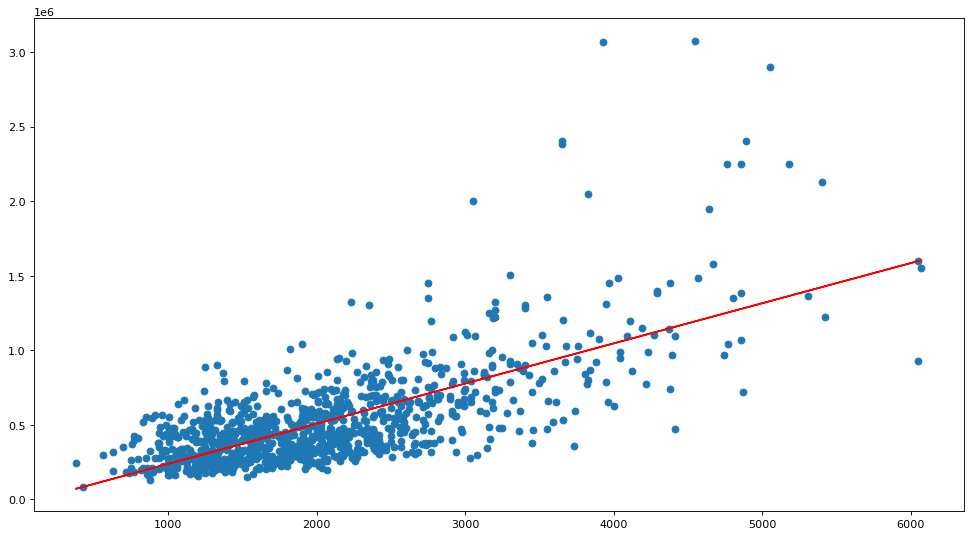

-32304.654721027997
[269.46205468]
0.49670880166311393


In [51]:
#b)
#  Evaluate and visualise created model.

pr = model.predict(X)
plt.figure(figsize=(15,8),dpi=80)
plt.scatter(X,y)
plt.plot(X,pr, color = 'red')
plt.show()

print(model.intercept_)
print(model.coef_)
print(model.score(X,y))

# The estimated regression function, represented by the red line, has the equation f(x) = b0 + b1 * x. 
# The attributes of model are .intercept_, which represents the coefficient b0, and .coef_, which represents b1.
# .score() - the arguments are the predictor x and response y, and the return value is R^2.

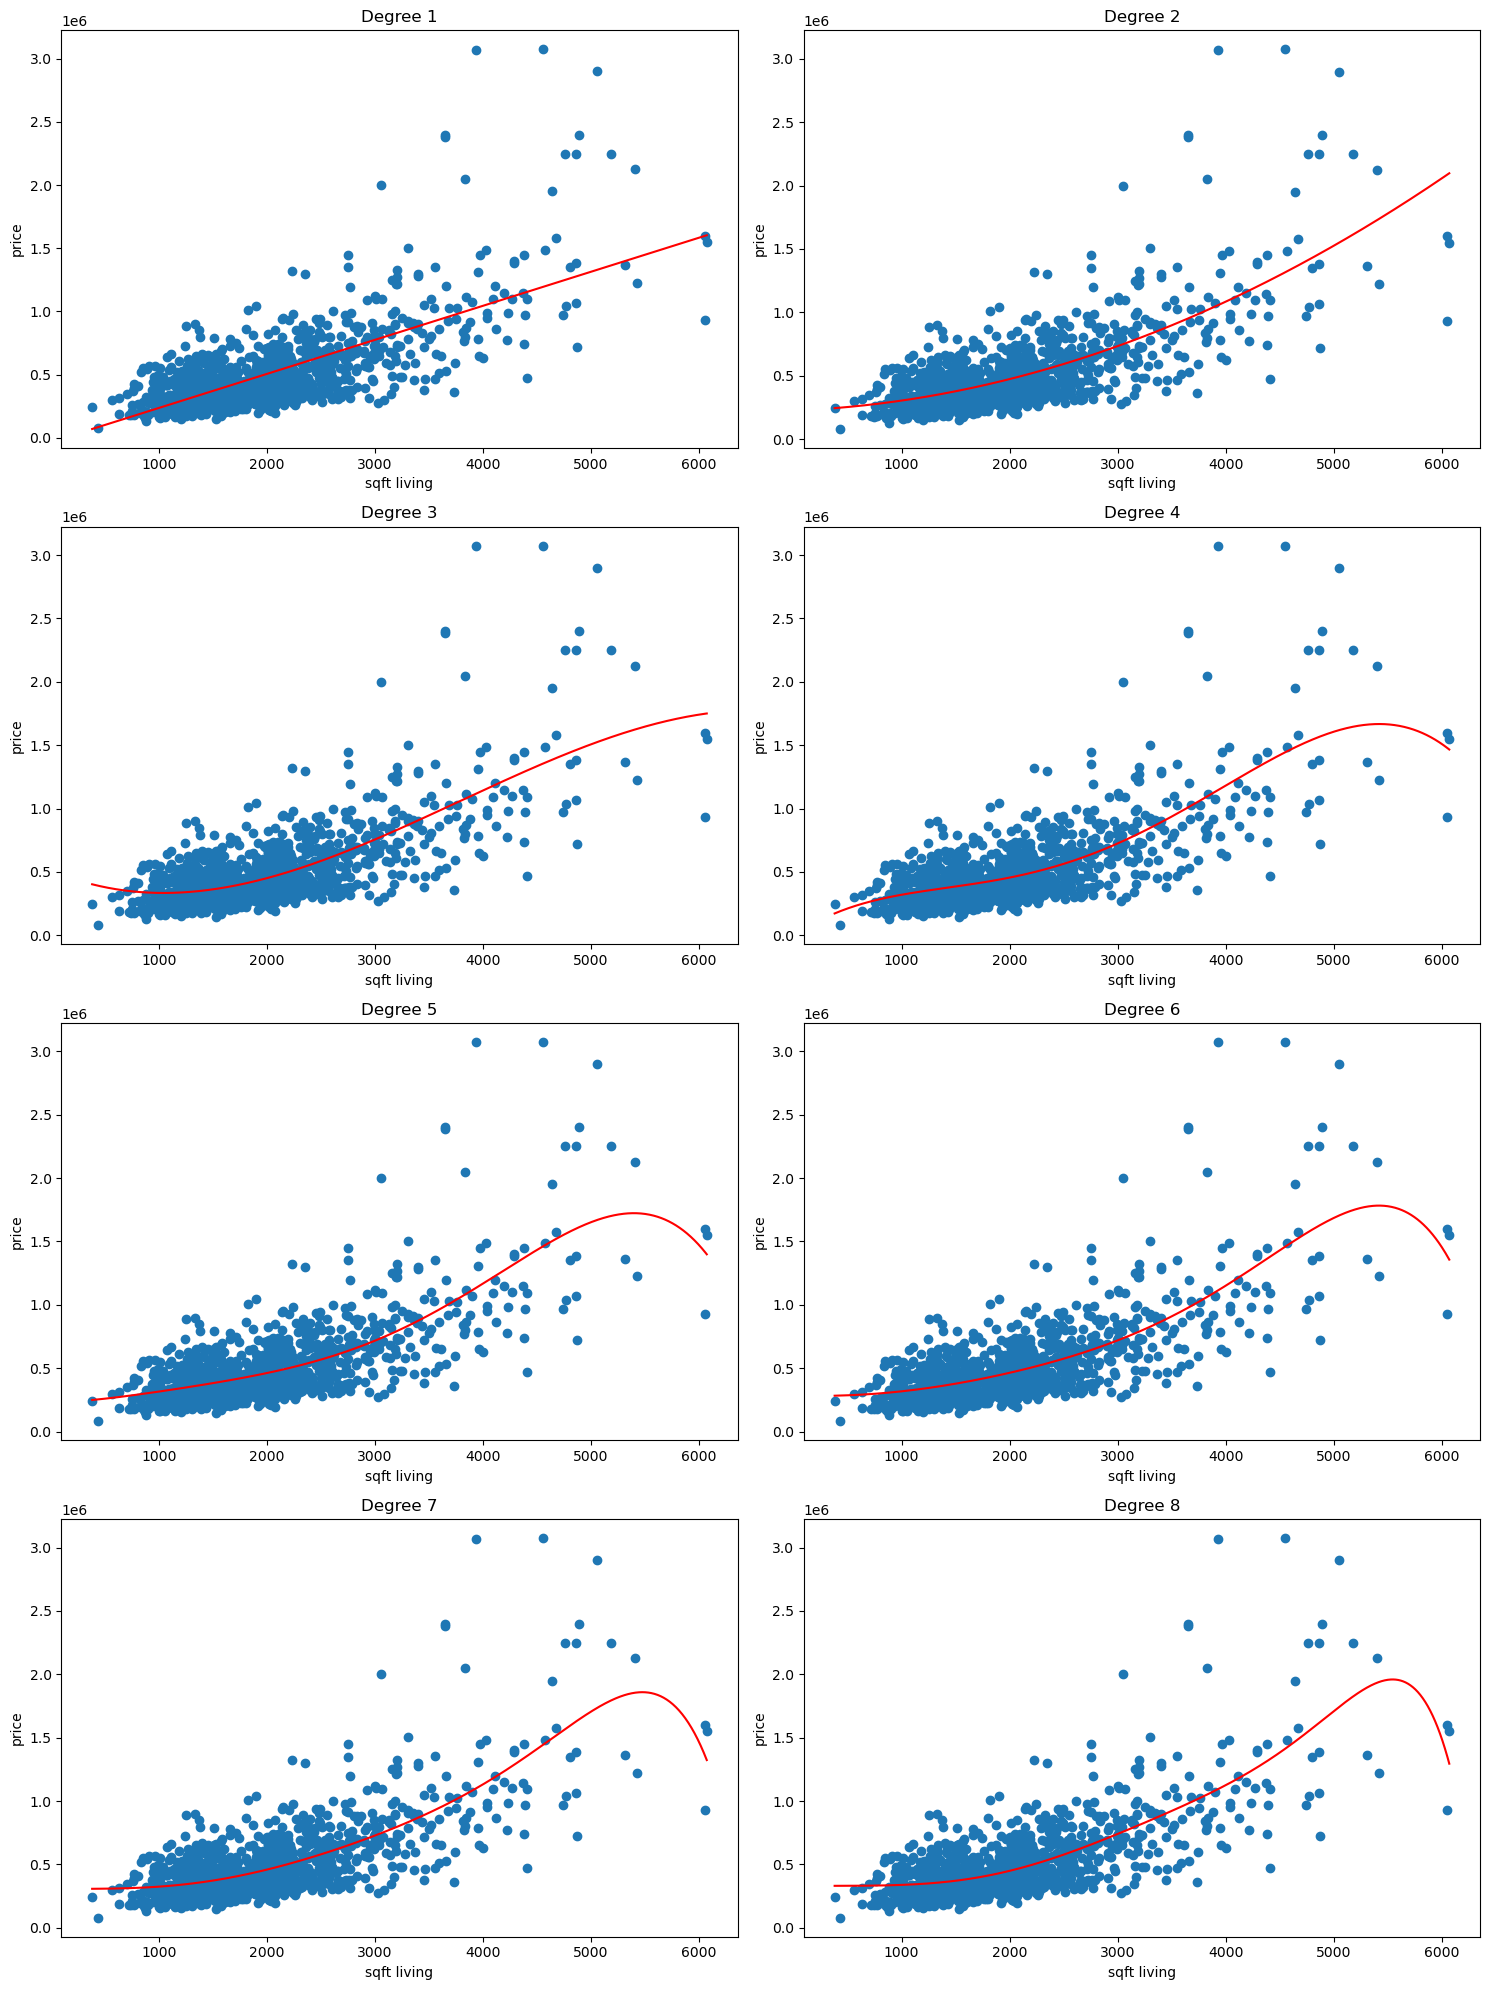

In [52]:
#c)
# Create and plot higher order polynomial regression models.

# Now I am creating and ploting higher order polynomial regression models from degree 1 to 8.
# As You can see below I decided to use sklearn.pipeline.

# Definition of pipeline class according to scikit-learn is:
# Sequentially apply a list of transforms and a final estimator. 
# Intermediate steps of pipeline must implement fit and transform methods and the final estimator 
# only needs to implement fit.


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

plt.figure(figsize=(15,20))

errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    pipe = Pipeline([('transformer', poly),('estimator', model)])
    pipe.fit(X, y)
    X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
    pr = pipe.predict(X_test)
    
    model.fit(X_order, y)
    y_pr = model.predict(X_order)
    errors.append(mean_squared_error(y, y_pr))

    ax = plt.subplot(4,2,order)
    ax.scatter(X,y)
    ax.plot(X_test,pr,'r')
    plt.xlabel('sqft living')
    plt.ylabel('price')
    plt.title("Degree {}".format(order))
    
plt.tight_layout()
plt.show()

# As you can see in the graphs below, as the degree increases, 
# the line becomes more and more curved to adjust to the data. It is due to the higher polynomial's degree.

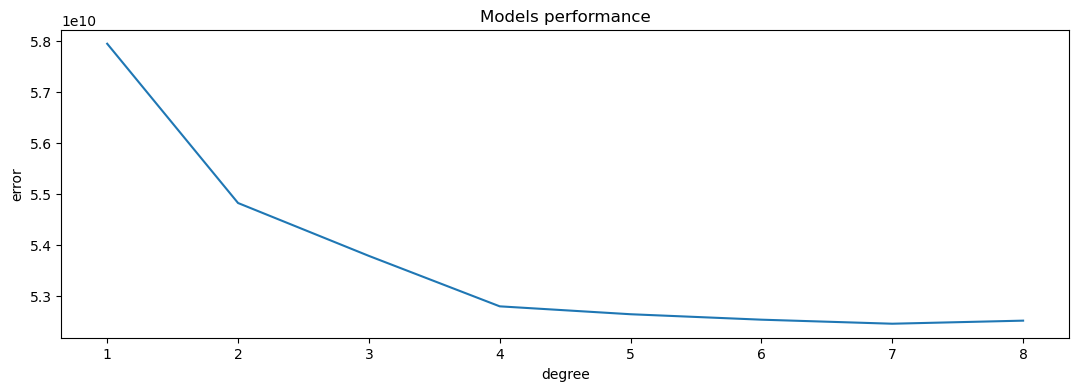

In [53]:
#Your code:
plt.figure(figsize=(13, 4))
plt.plot([1,2,3,4,5,6,7,8], errors)
plt.title("Models performance")
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

# Graph of the error depending on the degree.

# As can be seen, the error decreases with increasing degree. Initially, the decrease is much greater. 
# From degree 4, the error decreases very slowly. 
# Degree 8 compared to 7 has a slightly larger error. If we continued to increase the degree, 
# it would most likely lead to the Runge's phenomenon.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

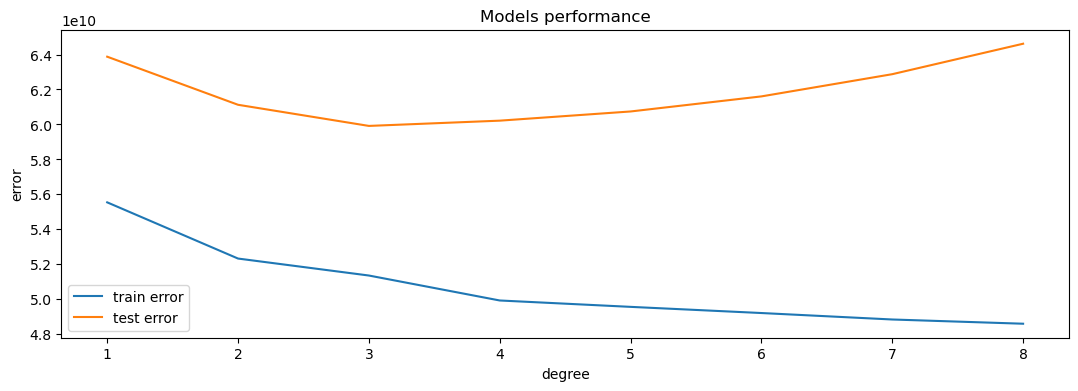

In [54]:
#a)

model_linear = LinearRegression()

error_train = [] 
error_test = [] 
degree = []

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    # Generate polynomial and interaction features.
    poly = PolynomialFeatures(order, include_bias = False)
    # Fit to data, then transform it.
    x_train_poly = poly.fit_transform(X_train)
    # Fit to data, then transform it.
    x_test_poly = poly.fit_transform(X_test)

    # Fit linear model.
    model_linear.fit(x_train_poly, y_train)
    # Predict using the linear model.
    y_train_pr = model_linear.predict(x_train_poly)
    # Predict using the linear model.
    y_test_pr = model_linear.predict(x_test_poly)

    # Appending items to our 3 lists.
    error_train.append(mean_squared_error(y_train, y_train_pr))
    error_test.append(mean_squared_error(y_test, y_test_pr))
    degree.append(order)

# Plot preparation
plt.figure(figsize=(13,4))
plt_train_error = plt.plot(degree, error_train, label = "train error")
plt_test_error = plt.plot(degree, error_test, label = "test error")
plt.title('Models performance')
plt.xlabel('degree')
plt.ylabel('error')
plt.legend()
plt.show()

# As can be seen in the chart below the Train Error gets smaller with each degree.
# The situation is different for Test Error, which only decreases to a third degree and then starts to increase.
# Train dataset has smaller error because we trained this model on this data already. The train dataset in general
# has a greater error.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

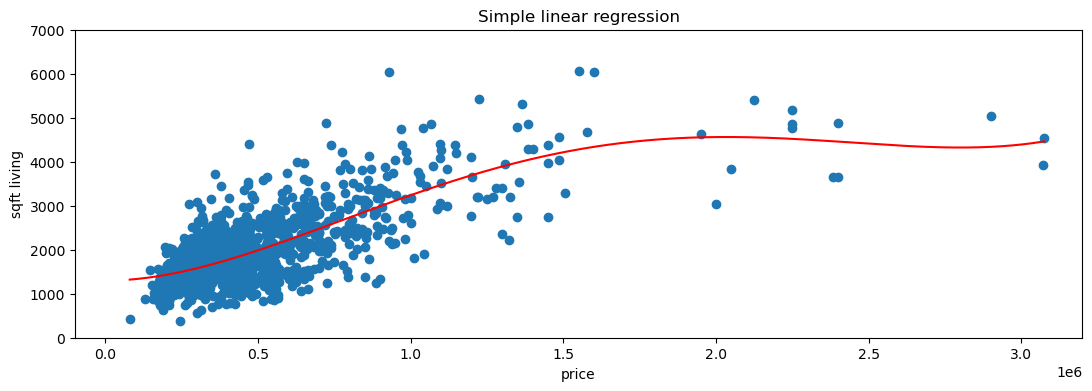

Mean squared error equals: 364604.5789281485


In [55]:
#a)
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Now we are training model to predict sqft_living for a given house price. 

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
poly = PolynomialFeatures(4, include_bias = False)
X_order = poly.fit_transform(X)
    
pipe = Pipeline([('transformer', poly),('estimator', model)])
pipe.fit(X, y)
X_test = np.linspace(X.min(),X.max(),1000).reshape(-1,1)
pr = pipe.predict(X_test)
    
model.fit(X_order, y)
y_pr = model.predict(X_order)

# Preparing Plot
plt.figure(figsize=(13, 4))
plt.scatter(X,y)
plt.plot(X_test,pr,'r')
plt.xlim((-100000,3200000))
plt.ylim((0,7000))
plt.ylabel("sqft living")
plt.xlabel("price")
plt.title("Simple linear regression")
plt.show()

# Printing Mean Squared Error
mse = mean_squared_error(y, y_pr)
print("Mean squared error equals: " + str(mse))

# The Mean Squared Error (MSE) is a common way to measure the prediction accuracy of a model.
# of an estimator measures the average of error squares i.e. the average squared difference between 
# the estimated values and true value. It is a risk function, corresponding to the expected value of the squared error loss.

In [56]:
#b) 
# Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

# Now I will use more criteria and hope to get a lower MSE. Now it uses variables like:
# sqft_living, grade, view, yr_renovated, yr_built, bathrooms, condition. I think that with a larger number 
# of properly selected variables I will get a lower MSE than before.

X2 = house_df[['sqft_living', 'grade', 'view', 'yr_renovated', 'yr_built', 'bathrooms', 'condition']].values.reshape(-1,7)
y2 = house_df.price.values.reshape(-1)

poly2 = PolynomialFeatures(3, include_bias = False)
X2 = poly2.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=43)
    
model2 = LinearRegression() 
_= model2.fit(X2_train, y2_train) 

y2_pred = model2.predict(X2_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y2_pred, y2_test)))

# As you can see, as expected, I got a lower MSE. The first time it was 48749581797.04599 
# and the second time with more data it was 42384370686.89315. It means that we got better 
# model for predicting house prices.

Mean squared error equals: 48749581797.04599
Mean squared error equals: 42384370686.89315
